# Quickstart
This jupyter notebook gives a good introduction in how to get started with USDA

Firts, make sure that:
- pip install pipenv
- pipenv install
- pipenv shell

Let's get started with some simple example.

In [23]:
# Import standart library
from pathlib import Path

# Our USDA python package
# from usda.api.services import FASService, MARSService, NASSService
from src.usda.api.services import FASService, MARSService, NASSService

Definition: 
- ROOT project direction path
- Path save data from API

In [24]:
ROOT_DIR_PATH = Path(__name__).absolute().parent
PATH_TO_SAVE_DATA = ROOT_DIR_PATH / "data"

Setting all configuration about each API services
- FAS (Foreign Agricultural Service)
- MARS (Agricultural Marketing Service)
- NASS (National Agricultural Statistics Service)

In [25]:
# API_KEY taken after registering on each website
SETTINGS = {
    "fas": {
        "api_key": "api_key",
        "url": "https://apps.fas.usda.gov/OpenData/swagger/docs/v1",
    },
    "mars": {
        "api_key": "api_key",
        "url": "https://marsapi.ams.usda.gov/services/v1.2",
    },
    "nass": {
        "api_key": "api_key",
        "url": "http://quickstats.nass.usda.gov/api",
    },
}

Initializing instances of API services

In [26]:
# Init USDA APIs services
nass = NASSService(SETTINGS["nass"]["api_key"])
fas = FASService(SETTINGS["fas"]["api_key"])
mars = MARSService(SETTINGS["mars"]["api_key"])

Now, let's try to send GET HTTP request with passing parameters to the National Agricultural Statistics Service server

In [27]:
# Send GET HTTP request to server and responce status code must be 200
status_code = nass.get(params={"commodity_desc": "CORN", "year__GE": "2018", "state_alpha": "VA"})
print(f"status code: {status_code}")
print(f"url: {nass.url}")

status code: 200
url: http://quickstats.nass.usda.gov/api


Now, let's get and print dataframe with information from API

In [28]:
df_nass = nass.get_dataframe()
print(df_nass.head())

  state_name                                    domaincat_desc watershed_desc  \
0   VIRGINIA            IRRIGATION METHOD, PRIMARY: (PRESSURE)                  
1   VIRGINIA                                     NOT SPECIFIED                  
2   VIRGINIA                            WATER SOURCE: (GROUND)                  
3   VIRGINIA                   WATER SOURCE: (ON FARM SURFACE)                  
4   VIRGINIA  AREA IRRIGATED, HARVESTED: (1,000 OR MORE ACRES)                  

  util_practice_desc county_code week_ending source_desc sector_desc  \
0              GRAIN                              CENSUS       CROPS   
1              GRAIN                              CENSUS       CROPS   
2              GRAIN                              CENSUS       CROPS   
3              GRAIN                              CENSUS       CROPS   
4              GRAIN                              CENSUS       CROPS   

  country_code congr_district_code  ... region_desc begin_code  \
0         9000

Draw histogram sum Value CORNs from 2018 to 2022

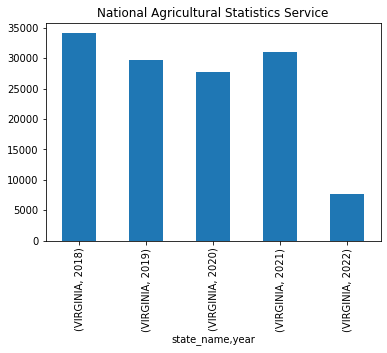

In [29]:
nass.plot(df_nass, x="year", y="Value")

Save dataframe in the Excel file for the next analyzing

In [30]:
path = nass.to_file(PATH_TO_SAVE_DATA, df_nass)
print(f"see: {path}")

see: /home/boss/Dev/usda-package/data/NASSService.csv


Now, let's try to save information in Excel file by year each sheet

In [31]:
# from usda.api.utils.merge_and_savefile
from src.usda.api.utils.merge_and_savefile import merge_and_savefile

Now, let's try to send GET HTTP request with passing parameters to the Foreign Agricultural Service server

In [32]:
commodityCode = 401 # CORN
year = 2018
status_code = fas.get(endpoint=f"/esr/exports/commodityCode/{commodityCode}/allCountries/marketYear/{year}")
print(f"status code: {status_code}")
print(f"url: {fas.url}")

df_fas = fas.get_dataframe()
print(df_fas.head())

status code: 200
url: https://apps.fas.usda.gov/OpenData/api
   commodityCode  countryCode  weeklyExports  accumulatedExports  \
0            401         1220           4376                4376   
1            401         2010         385113              385113   
2            401         2050              0                   0   
3            401         2110              0                   0   
4            401         2150          11278               11278   

   outstandingSales  grossNewSales  currentMYNetSales  \
0             50858          17552              17552   
1           4502810         455384             433369   
2            181467           2000               2000   
3             82186              0                  0   
4             53628            900              12178   

   currentMYTotalCommitment  nextMYOutstandingSales  nextMYNetSales  unitId  \
0                     55234                       0               0       1   
1                   4887923  

Now, let's try to save information in Excel file by year each sheet

In [33]:
# from usda.api.utils.merge_and_savefile
from src.usda.api.utils.merge_and_savefile import merge_and_savefile

merge_and_savefile(PATH_TO_SAVE_DATA, dfs={"nass": df_nass[df_nass["year"] == 2018], "fas": df_fas}, year=2018)